# 📊 Eksplorasi Data

Eksplorasi Data (Exploratory Data Analysis / EDA) merupakan tahap awal yang sangat penting dalam proses analisis data.  
Tujuan dari eksplorasi data adalah untuk memahami struktur, pola, dan karakteristik utama dari dataset yang digunakan.  

Beberapa hal yang biasanya dilakukan pada tahap EDA, antara lain:
- Melihat bentuk umum dataset (jumlah baris, kolom, dan tipe data).
- Mengecek apakah ada data yang hilang (*missing values*).
- Mengetahui distribusi data.
- Mengidentifikasi adanya nilai ekstrem (*outliers*).
- Membuat visualisasi awal untuk memahami hubungan antar variabel.

Tahap ini membantu kita menemukan insight awal sebelum melakukan pemodelan lebih lanjut.  
Dengan eksplorasi data, kita bisa memastikan kualitas dataset serta memilih metode analisis yang tepat.

---


## Hubungkan ke databse dan ambil data

In [ ]:
# Import library yang diperlukan
%pip install -q pandas sqlalchemy matplotlib seaborn
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Atur koneksi database (sama seperti script sebelumnya)
db_user = 'postgres'
db_password = '123456789'
db_host = 'localhost'
db_port = '5432'
db_name = 'sains_data'
table_name = 'penjualan'

connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_url)

# Query untuk mengambil semua data dari tabel
query = f'SELECT * FROM {table_name}'

# Ambil data dan simpan ke DataFrame
df = pd.read_sql(query, engine)

print("Data berhasil diambil dari PostgreSQL.")
df.head()

Data berhasil diambil dari PostgreSQL.


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## pembersihan dan persiapan data

In [11]:
# --- Pembersihan Data ---
import numpy as np # <-- TAMBAHKAN BARIS INI

# 1. Ganti semua nilai '?' dengan nilai kosong standar (NaN)
# Saat diambil dari SQL, '?' mungkin dibaca sebagai string.
# Kita perlu menggantinya agar bisa diproses sebagai angka.
df.replace('?', np.nan, inplace=True)

# 2. Konversi kolom menjadi tipe data numerik
# Banyak kolom yang seharusnya angka kini bertipe 'object' (teks) karena '?'
# Kita paksa konversi ke numerik. Jika ada nilai yang tidak bisa dikonversi, akan menjadi NaN.
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData setelah pembersihan awal (mengganti '?' dan konversi tipe data):")
display(df.head())


Data setelah pembersihan awal (mengganti '?' dan konversi tipe data):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## analisis tipe data

In [12]:
# Melihat informasi dasar DataFrame, termasuk tipe data
print("Informasi Tipe Data dan Nilai Non-Null:")
df.info()

Informasi Tipe Data dan Nilai Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs 

## missing value

In [14]:
# Menghitung jumlah missing values di setiap kolom
print("Jumlah Missing Values per Kolom (Sebelum Diisi):")
print(df.isnull().sum())

# Mengisi nilai yang hilang (NaN) dengan median dari masing-masing kolom
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nJumlah Missing Values per Kolom (Setelah Diisi):")
print(df.isnull().sum())

print("\nDataset kini sudah bersih dari missing values.")

Jumlah Missing Values per Kolom (Sebelum Diisi):
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B               

## outlier analysis

Analisis Outlier untuk kolom 'Age':
Batas Bawah: 2.00
Batas Atas: 50.00
Jumlah outlier terdeteksi: 8


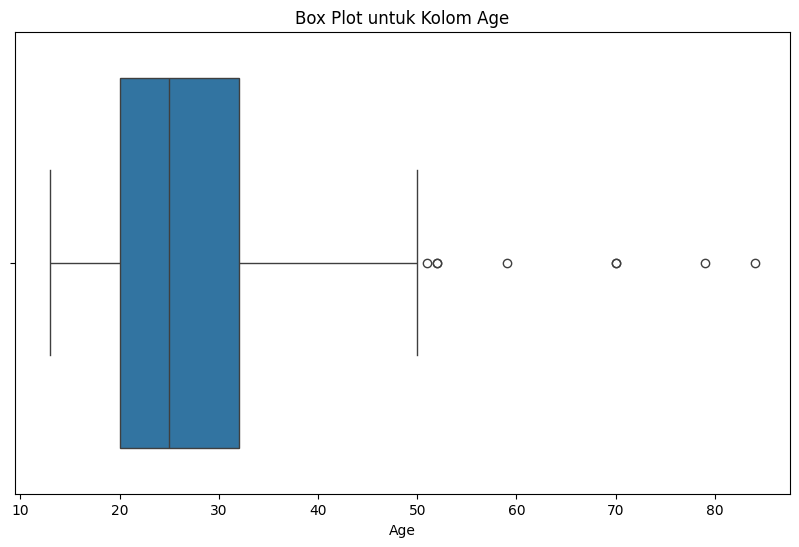

In [15]:
# Pilih kolom numerik untuk dianalisis
kolom_numerik = 'Age'

# Hitung Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = df[(df[kolom_numerik] < batas_bawah) | (df[kolom_numerik] > batas_atas)]

print(f"Analisis Outlier untuk kolom '{kolom_numerik}':")
print(f"Batas Bawah: {batas_bawah:.2f}")
print(f"Batas Atas: {batas_atas:.2f}")
print(f"Jumlah outlier terdeteksi: {len(outliers)}")

# Visualisasi dengan Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[kolom_numerik])
plt.title(f'Box Plot untuk Kolom {kolom_numerik}')
plt.show()

## konsistensi data

In [16]:
# Pilih kolom untuk diperiksa konsistensinya
kolom_kategori = 'Smokes'

# Tampilkan semua nilai unik di kolom tersebut
print(f"Nilai unik di kolom '{kolom_kategori}':")
print(df[kolom_kategori].unique())

Nilai unik di kolom 'Smokes':
[0. 1.]


## Data Duplicate

In [17]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris data yang terduplikasi: {jumlah_duplikat}")

# Jika ada, Anda bisa menghapusnya dengan:
# df.drop_duplicates(inplace=True)

Jumlah baris data yang terduplikasi: 28
